In [3]:
from prac_code.value import Value
from prac_code.plotter import Plotter

import numpy as np
import pandas as pd

## Упражнение 1

Увеличение

In [4]:
V = Value(values=[395], syst=5) / 2

In [5]:
print(V)

198 ± 2


In [6]:
tab1 = pd.read_csv("1.csv", '\t')

In [7]:
tab1

,y0,y1,x0
0,1852,2355,2124


In [8]:
y0, *_ = tab1.y0
y1, *_ = tab1.y1
x0, *_ = tab1.x0
y0 = Value(values=[y0], syst=1)
y1 = Value(values=[y1], syst=1)
x0 = Value(values=[x0], syst=1)
a0 = y1 - y0
lambd = 0.0006328

In [9]:
tab2 = pd.read_csv("2.csv", '\t')
tab2.xi = tab2.xi.apply(Value) + Value(values=[0], syst=1)
temp = tab2.N.copy()
tab2.N = tab2.xe
tab2.xe = temp
tab2.xe = tab2.xe.apply(Value) + Value(values=[0], syst=5)
tab2["dxe"] = tab2.xe / tab2.N
tab2["dx"] = tab2.dxe / V
tab2["b"] = -tab2.xi + x0
tab2["a"] = -tab2.b + a0
tab2["d"] = (tab2.a + tab2.b) / tab2.dx * lambd
tab2

,xi,N,xe,dxe,dx,b,a,d
0,2110.0 ± 1.0,3,31 ± 5,10.3 ± 1.7,0.052 ± 0.008,14.0 ± 1.4,489 ± 2,6.1 ± 1.0
1,2080.0 ± 1.0,8,86 ± 5,10.8 ± 0.6,0.054 ± 0.003,44.0 ± 1.4,459 ± 2,5.8 ± 0.3
2,2050.0 ± 1.0,13,147 ± 5,11.3 ± 0.4,0.057 ± 0.002,74.0 ± 1.4,429 ± 2,5.6 ± 0.2
3,2020.0 ± 1.0,16,195 ± 5,12.2 ± 0.3,0.0617 ± 0.0018,104.0 ± 1.4,399 ± 2,5.16 ± 0.15
4,1980.0 ± 1.0,19,241 ± 5,12.7 ± 0.3,0.0642 ± 0.0016,144.0 ± 1.4,359 ± 2,4.96 ± 0.12
5,1960.0 ± 1.0,18,251 ± 5,13.9 ± 0.3,0.0706 ± 0.0017,164.0 ± 1.4,339 ± 2,4.51 ± 0.11
6,1930.0 ± 1.0,18,277 ± 5,15.4 ± 0.3,0.0779 ± 0.0017,194.0 ± 1.4,309 ± 2,4.09 ± 0.09
7,1897.0 ± 1.0,17,289 ± 5,17.0 ± 0.3,0.0861 ± 0.0018,227.0 ± 1.4,276 ± 2,3.70 ± 0.08
8,1970.0 ± 1.0,19,260 ± 5,13.7 ± 0.3,0.0693 ± 0.0016,154.0 ± 1.4,349 ± 2,4.59 ± 0.11


In [10]:
with open("res1.csv", "w") as file:
    file.write(tab2.to_csv())

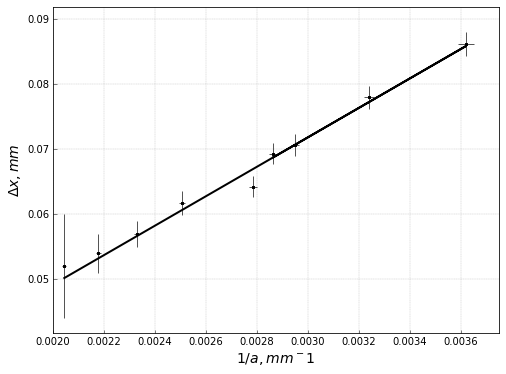

In [11]:
line, *_ = Plotter(draw_legend=False).set_name("1diva").set_title("").set_y_name("$\Delta x, mm$").set_x_name(
        "$1/a, mm^-1$"). \
        add_line(Plotter.get_new_line(y_value=tab2.dx, x_value=tab2.a**-1,
                                      draw_error=True, legend='$f_1 = 300Hz$', fit=True, color='black', marker="s")). \
        plot(show=True, save=True, xlim=(0.002, 0.00375))

In [15]:
n = 1.5
A = Value(values=[line.a], syst=line.sigma_a)
print(line)
teta = a0 * lambd / (A * (n - 1))
print(teta * 57.2958)

FitParameters(legend='$f_1 = 300Hz$', a=0.04490379446380102, sigma_a=0.0022946319389723384, b=0.048930022518024266, sigma_b=0.0011261765976590045, r=0.9943123385424892)
8.1e+2 ± 4e+1


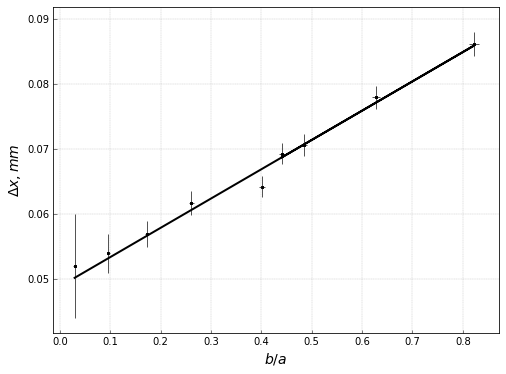

In [16]:
line, *_ = Plotter(draw_legend=False).set_name("bdiva").set_title("").set_y_name("$\Delta x, mm$").set_x_name(
        "$b/a$"). \
        add_line(Plotter.get_new_line(y_value=tab2.dx, x_value=tab2.b / tab2.a,
                                      draw_error=True, legend='$f_1 = 300Hz$', fit=True, color='black', marker="s")). \
        plot(show=True, save=True)

In [17]:
print(line)
A = Value(values=[line.a], syst=line.sigma_a)
teta = lambd / (A * (n - 1))
print(teta * 57.2958)

FitParameters(legend='$f_1 = 300Hz$', a=0.04490379446380102, sigma_a=0.0022946319389723384, b=0.048930022518024266, sigma_b=0.0011261765976590045, r=0.9943123385424892)
1.61 ± 0.08


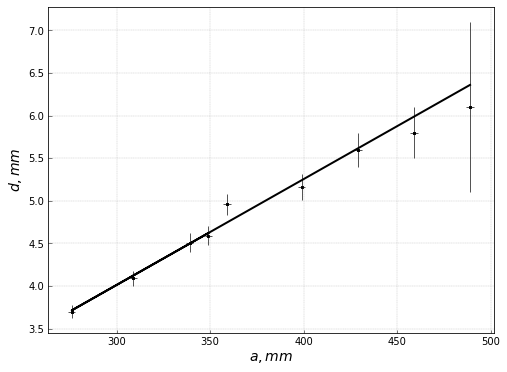

In [18]:
line, *_ = Plotter(draw_legend=False).set_name("dofa").set_title("").set_y_name("$d, mm$").set_x_name(
        "$a, mm$"). \
        add_line(Plotter.get_new_line(y_value=tab2.d, x_value=tab2.a,
                                      draw_error=True, legend='$f_1 = 300Hz$', fit=True, color='black', marker="s")). \
        plot(show=True, save=True)

In [19]:
print(line)
A = Value(values=[line.a], syst=line.sigma_a)
teta = A / (n - 1)
print(teta * 57.2958)

FitParameters(legend='$f_1 = 300Hz$', a=0.012424479848651804, sigma_a=0.000689779175969633, b=0.2860013271117982, sigma_b=0.23034095615265662, r=0.9914522698150858)
1.42 ± 0.08


## Упражнение 2

In [20]:
tab3 = pd.read_csv("3.csv", '\t')
tab3.xi = tab3.xi.apply(Value) + Value(values=[0], syst=1)
tab3["ai"] = tab3.xi - (x0 - a0)
tab3

,yi,xi,ai
0,4,1930.0 ± 1.0,309 ± 2
1,6,2000.0 ± 1.0,379 ± 2
2,8,2065.0 ± 1.0,444 ± 2
3,2,1846.0 ± 1.0,225 ± 2
4,5,1970.0 ± 1.0,349 ± 2


In [21]:
with open("res2.csv", "w") as file:
    file.write(tab3.to_csv())

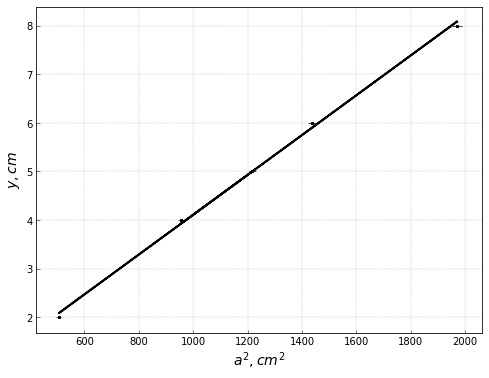

In [22]:
line, *_ = Plotter(draw_legend=False).set_name("ycai").set_title("").set_y_name("$y, cm$").set_x_name(
        "$a^2, cm^2$"). \
        add_line(Plotter.get_new_line(y_value=tab3.yi.apply(Value) + Value(values=[0], syst=0.01), x_value=(tab3.ai / 10) ** 2,
                                      draw_error=True, legend='$f_1 = 300Hz$', fit=True, color='black', marker="s")). \
        plot(show=True, save=True)
B = Value(values=[line.a], syst=line.sigma_a)

In [23]:
V = 68.5
tab4 = pd.read_csv("4.csv", "\t")
tab4.ri = tab4.ri.apply(Value) + Value(values=[0], syst=5)
tab4["Ri"] = tab4.ri / V
xn = Value(values=[2001], syst=1)
an = xn - (x0 - a0)
tab4

,m,ri,Ri
0,1,31 ± 5,0.45 ± 0.07
1,2,62 ± 5,0.91 ± 0.07
2,3,87 ± 5,1.27 ± 0.07
3,4,106 ± 5,1.55 ± 0.07
4,5,122 ± 5,1.78 ± 0.07


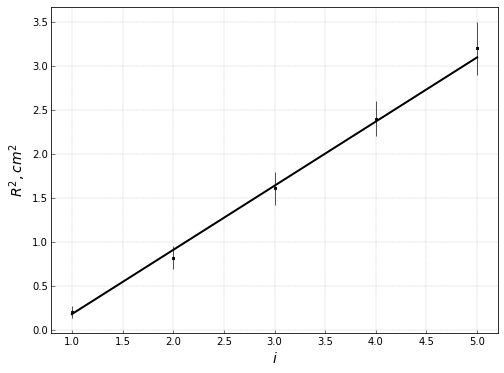

In [24]:
line, *_ = Plotter(draw_legend=False).set_name("Rsofi").set_title("").set_y_name("$R^2, cm^2$").set_x_name(
        "$i$"). \
        add_line(Plotter.get_new_line(y_value=tab4.Ri ** 2, x_value=tab4.m.apply(Value),
                                      draw_error=True, legend='$f_1 = 300Hz$', fit=True, color='black', marker="s")). \
        plot(show=True, save=True)

In [26]:
A = Value(values=[line.a], syst=line.sigma_a)
print(A)
h = (4 * n * lambd/10 * (an ** 2)/100) / A
print(h)

0.73 ± 0.02
0.75 ± 0.03


In [28]:
alpha = B  * h / (2 * n ** 2)
print(B)
print(alpha * 57.2958)

0.00410 ± 0.00009
0.0392 ± 0.0016


In [23]:
29 * lambd / (2 * 10 * n) * 57.2958

0.035048222831999994